# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


In [50]:
df = pd.read_csv('data/human_body_temperature.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [52]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [53]:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [54]:
print(df.describe())

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


In [55]:
print('The statistics of the female data set:')
print(df[df.gender=='F'].describe())

The statistics of the female data set:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


In [56]:
print('The statistics of the male data set:')
print(df[df.gender=='M'].describe())

The statistics of the male data set:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


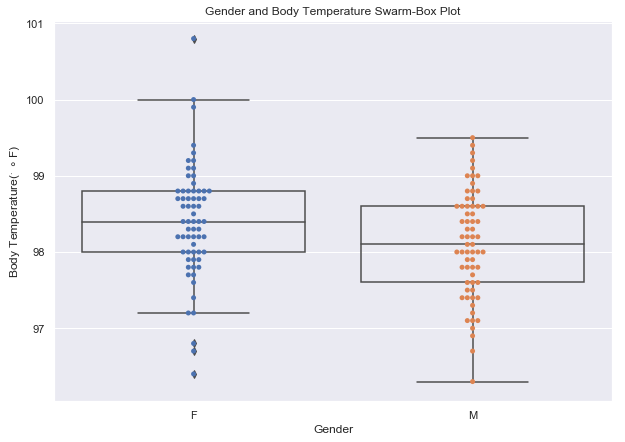

In [57]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x = 'gender', y = 'temperature', data = df)
_ = sns.boxplot(x = 'gender', y = 'temperature', data = df, boxprops = {'facecolor':'None'})
_ = plt.title('Gender and Body Temperature Swarm-Box Plot')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature($^.\circ$F)')

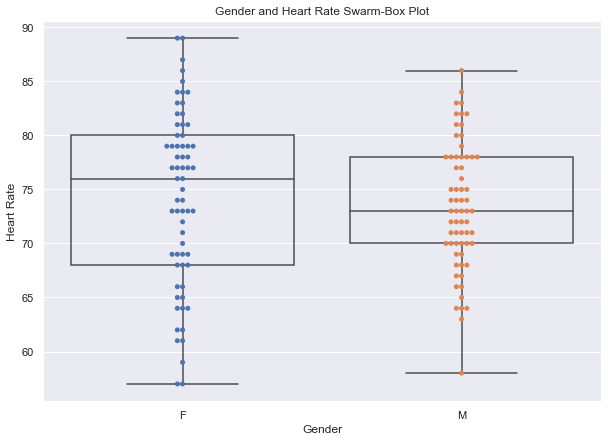

In [58]:
plt.figure(figsize = (10,7))
_ = sns.swarmplot(x = 'gender', y = 'heart_rate', data = df)
_ = sns.boxplot(x = 'gender', y = 'heart_rate', data = df, boxprops = {'facecolor':'None'})
_ = plt.title('Gender and Heart Rate Swarm-Box Plot')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Heart Rate')

## 1. Is the Distribution of Body Temperature Normal?




C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


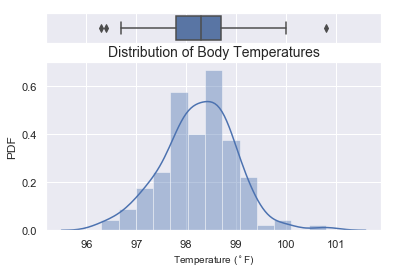

In [64]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for temperature:
sns.boxplot(df.temperature, ax = boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax = histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=10)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=14)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel = " ")

# Display the plots:
plt.show()

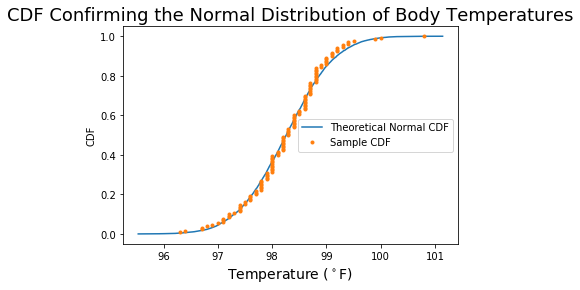

In [29]:
# Compute CDFs
x_temp, y_temp = ecdf(df.temperature)
x_norm, y_norm = ecdf(normal)

# Plot both CDFs on the same plot
_ = plt.plot(x_norm, y_norm)
_ = plt.plot(x_temp, y_temp, marker = '.', linestyle = 'none')

# Label axes and and add legend/title
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
_ = plt.ylabel('CDF')
_ = plt.legend(('Theoretical Normal CDF', 'Sample CDF'), loc = 'center right')
_ = plt.title('CDF Confirming the Normal Distribution of Body Temperatures', fontsize=18)

# Save and display the plots
plt.savefig('cdf_body_temps.png')
plt.show()

In [72]:
k2, p = stats.normaltest(df.temperature)
print("p = {}".format(p))

p = 0.2587479863488254


In [73]:
alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Distribution of Body Temperature iS NOT Normal")
else:
    print("Distribution of Body Temperature is Normal")

Distribution of Body Temperature is Normal



Conclusion:

The distribution of the observations is symmetrical, bell-shaped, and the CDF of the sample data is closely aligned. Also68% of the observations are within 1 standard deviation, 95% of observations are within 2 standard deviations and 99% of observations are within 3 standard deviations. Distribution of the body temperature is normal.



# 2. Is the sample size large? Are the observations independent?



According to central limit theorem, our sample should be at least 30. Since the sample size is 130 here, it is adequate and observations are independent.

# 3. Is the true population mean really 98.6 degrees F?
## a. First try a bootstrap hypothesis test.
To investigate this question, we need to frame our hypothesis for testing.

(The null hypothesis) Ho: The population mean temperature = 98.6 F (Ho: μ1 = μ2)

(The alternative hypothesis) Ha: The population mean temperature ≠ 98.6 F (H1: μ1 ≠ μ)
¶ 

In [37]:
# Define bootsrap functions

def replicate(data, func):
    """Return replicate of a resampled data array"""
    
    # Create the resampled array and return the statistic of interest
    return func(np.random.choice(data, size=len(data)))   

def draw_replicates(data, func, size=1):
    """Draw bootstrap replicate"""
    
    # Initialize array of replicates
    replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
            replicates[i] = replicate(data, func)            
    return replicates

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


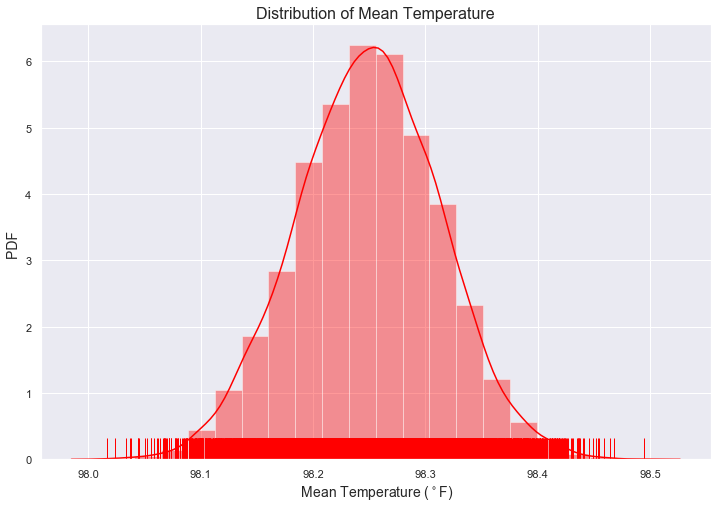

In [38]:
temp_np_arr = np.array(df['temperature'])
replicates  = draw_replicates(temp_np_arr, np.mean, 10000)
plt.figure(figsize=(12,8))
sns.distplot(replicates, rug='True', bins=20, color = 'red')
plt.xlabel(' Mean Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF ', fontsize=14)
plt.title('Distribution of Mean Temperature', fontsize=16)
plt.show()

In [39]:
# Compute the confidence interval
conf_int = np.percentile(replicates,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [98.12307692 98.37384615]


In [40]:
# Compute the p-value
p = np.sum(replicates >= 98.6) / len(replicates)
print ('p-value = ', p)

p-value =  0.0


### Conclusion for the bootstrap hypothesis test:

Since p-value is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis that the poulation mean differs from 98.6 F. Based on the 95% confidence interval, temperatures between 98.12 and 98.37 are considered normal.


### b. Try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

For this test, we will use a one-sample test since we are only given one sample data set. I have determined the hypothesis (with a confidence level of 95% as follows:

    (The null hypothesis) Ho: The population mean temperature = 98.6 F   (Ho: μ1 = μ2)

    (The alternative hypothesis) Ha: The population mean temperature ≠ 98.6 F  (H1: μ1 ≠ μ)

For this situation, we will be computing a t-test since we are comparing our sample mean (98.25) against a proposed population mean (98.6). For the test, we will reject the null hypothesis if the test statistic is greater than 1.96 standard deviations or outside of a 95% confidence level).


In [41]:
# Use one-sample test with the null hypothesis that true population mean is 98.6
# Since we do not know the population standard deviation, we will use t-statistic. 

t, p = stats.ttest_1samp(df.temperature, 98.6)
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07



Conclusion:

Our test returns a t-statistic of 5.45. This means that we would observe a mean of 98.6 at 5.45 standard deviations from our sample mean.

Furthermore, our P-value can be considered very small and suggests a very low probability of observing a body temperature of 98.6 or greater.

As we increase our sample size, our t-test will converge to yield a similar result as a z-test.

In the below test, we arrive to the same conclusion as the z-statistic suggests that a population mean of 98.6 would be observed more than 5 standard deviations from a population mean as determined by our sample. We find that our p-value in this test is even smaller than our t-test and suggests an even smaller probability that we would observe a population mean greater than 98.6


In [42]:
# Calculate standard error of the mean:
sem = s/np.sqrt(n)

# Calculate and save z-statistic:
z = (M - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08




As expected, the z-statistic is very close to the t-statistic and the p-value is also very low. Both z and t test yields the same result that the confidence interval do not contain 98.6, therefore giving us the same result.
## c. In this situation, is it appropriate to use the t or z statistics?

We have 130 records which is sufficient to implement central limit theorem. In that case, we may use z test here. Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results does not differ much as it may be seen above.
## d. Try using the other test. How is the result be different? Why?

Actually, this question's answer was given above. I tried t and z test. In every test the p-value is significantly less than significance level (0.05), so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that the true population mean is the normal human body temperature of 98.6°F.
# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
## a. Which one is the correct one to use?

This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.
## b. What is noticeable? What does this say about the difference in application of the t and z statistic?


t-statistic:


In [43]:
# Randomly select a size 10 array: 
temp_array_sub = np.random.choice(temp_np_arr, size=10, replace=True)

# Make an array of translated sample temperatures: translated_temp_sub
translated_temp_sub = temp_array_sub - np.mean(temp_array_sub) + 98.6

# Take bootstrap replicates of sampled body temperatures: temp_replicates_sub
temp_replicates_sub = draw_replicates(translated_temp_sub, np.mean, 10000)

# Compute fraction of replicates that are less than sampled body temperatures: p
p = np.sum(temp_replicates_sub <= np.mean(temp_array_sub)) / float(10000)

# Print the p-value
print ('p-value: {}'.format(p))

# t-test work 
sample_mean = np.mean(temp_array_sub) 
sample_std  = np.std(temp_array_sub)
sample_size = len(temp_array_sub)
mu_0 = 98.6
t_statistic = (sample_mean - mu_0) / (sample_std / sample_size**0.5)

from scipy import stats
# Multiply by two for the two tailed test
t_result = stats.norm.sf(abs(t_statistic))*2
print('t-statistic = {}'.format(t_result))

p-value: 0.1965
t-statistic = 0.38304123159222914



z-statistic:¶


In [44]:
# To conduct a z test we assume the population std is the same as the sample std
population_std = np.std(temp_array_sub)
z_statistic = (sample_mean - mu_0) / (population_std / sample_size**0.5)
z_result = stats.norm.sf(abs(z_statistic))*2
print('z-statistic = {}'.format(z_result))

z-statistic = 0.38304123159222914



### Conclusion:

Each time once we run the code, we get different t, z statistics and p value since the sample size is too small to evaluate. Therefore z and t statistics are not reliable at this point.
# 5. At what temperature should we consider someone's temperature to be "abnormal"?

We will get a 95% confidence interval according to the normal distribution to find out the outliers.
## a.Bootstrap Approach


In [45]:
bs_replicates = draw_replicates(temp_np_arr, np.mean, 10000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95 % confidence interval = {}'.format(conf_int))

95 % confidence interval = [98.12538462 98.37384615]



Conclusion:

We would consider someone's body temperature lower than 98.12 or higher than 98.37 to be considered abnormal.
### b.Frequentist Approach¶



In [46]:
#Standard Error
x = df.temperature

# Sample Size
# ddof = 1 is default -- Delta Degrees of Freedom
n = len(x)
SE = stats.sem(x, ddof = 1) 
#SE = (x.std()/np.sqrt(len(x)))

# t-critical at 95% confidence Level with 129 degrees of freedom
t_c = stats.t.ppf(0.975, df=n-1) 

# Margin of Error
moe = t_c * SE

# Confidence Interval
Confidence_int = x.mean() - moe , x.mean() + moe
Confidence_int

(98.12200290560804, 98.37645863285351)


Conclusion:

We would consider someone's body temperature abnormal if it is out of interval stated above.
# 6. Is there a significant difference between males and females in normal temperature?
## a. What test is used and why?

A two-sample t-test is also appropriate since the means of two independent samples are compared.


In [47]:
# Sample Sizes:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154




There is a difference between the mean temperatures of females and males in the sample data, but a statistical analysis will help determine if the difference is significant.

Null Hypothesis: There is no significant difference between female and male normal human body temperature.
$$H_0: \mu_{females} - \mu_{males} = 0$$

Significance Level: 95% Confidence
$$\alpha = 0.05$$
2 Sample t-test:


In [48]:
# We can again use a t-test as we are comparing the means from two samples
male_temps = df.temperature[df.gender == 'M']
female_temps = df.temperature[df.gender == 'F']

print('Mean body temp of male samples: ', np.mean(male_temps))
print('Mean body temp of female samples: ', np.mean(female_temps))

gender_ttest, gender_pval = stats.ttest_ind(a=male_temps, b=female_temps, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(gender_ttest), gender_pval))

Mean body temp of male samples:  98.1046153846154
Mean body temp of female samples:  98.39384615384613
The T-Statistic is 2 with a p-value of 0.023938264182934196




A two-sample t-test returned a t-statistic of 2 and p-value of 0.024, so here too, the null hypothesis is rejected. The difference in human body temperatures between females and males, though significant, is not extreme. Women tend to have a slightly higher body temperature.
## b. Write a story with your conclusion in the context of the original problem.

In this case, we examined the temperature of human body using graphical, bootstrapping and frequestist methods. As a summary:

For this research, we have 65 males and 65 females whom we used their temperature and heart rate values to examine the temperature of human body. From this sample group, it is easily observable that females's body temperature and heart rate value are higher than males's at first glance.

After implementing graphical and functional methods, we concluded that our 130 records show normal distribution which means that there is an integrity in sample data. It may give us meaningful insights and answers about questions at hand.

We are unable to say confidently the observations are independent as it is not evident whether they are unique people (and thus independent) or just periodic sampling of one male and one female subject.

When we compare the temperatures between these two groups, we observed that female temperatures have some outliers. Besides that, our research showed us that there is a possitive correlation between body temperature and heart rate. What does it mean? If both of them increases and decreases in the same time direction. But based on the data at hand, we can not say there is a causation between each other.

We went beyond in our reserch and made an assumption about body temperature. Our hypothesis was true population mean is really 98.6 degrees F. We used the sample bootstrap and frequentist testing and our p value which gives the createria to accept or reject the our hypothesis was too small accept our hypothesis. For taht reason, we rejected it. 
